In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
df_X = pd.read_csv('properties_2016.csv', index_col=0)
df_y = pd.read_csv('train_2016_v2.csv')

/Users/deep/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
zillow_df = df_y.join(df_X, on='parcelid',how='inner',lsuffix='copy')
zillow_df.head()



,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,2016-01-01,1.0,NaN,NaN,2.0,3.0,NaN,4.0,...,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13
1,14366692,-0.1684,2016-01-01,NaN,NaN,NaN,3.5,4.0,NaN,NaN,...,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
2,12098116,-0.0040,2016-01-01,1.0,NaN,NaN,3.0,2.0,NaN,4.0,...,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13
3,12643413,0.0218,2016-01-02,1.0,NaN,NaN,2.0,2.0,NaN,4.0,...,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13
4,14432541,-0.0050,2016-01-02,NaN,NaN,NaN,2.5,4.0,NaN,NaN,...,2.0,NaN,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13


In [4]:
# sns.heatmap(zillow_df.corr())
# plt.show()

# plt.hist(zillow_df.logerror.values, bins=100, range=(-1,1))
# plt.show()

#zillow_df.info()
dropped_cols = ['architecturalstyletypeid', 
                'basementsqft', 
                'buildingclasstypeid',
                'decktypeid',
                'finishedfloor1squarefeet',
                'finishedsquarefeet6',
                'finishedsquarefeet12',
                'finishedsquarefeet13',
                'finishedsquarefeet15',
                'finishedsquarefeet50',
                'fips',
                'pooltypeid10',
                'pooltypeid2',
                'pooltypeid7',
                'storytypeid',
                'typeconstructiontypeid',
                'propertyzoningdesc',
                'taxdelinquencyyear',
                'censustractandblock',
                'propertycountylandusecode',
                'transactiondate'
               ]

zillow = zillow_df.drop(dropped_cols, axis=1)
print(zillow.iloc[:,0:15].head())
zillow.iloc[:,15:].head()


   parcelid  logerror  airconditioningtypeid  bathroomcnt  bedroomcnt  \
0  11016594    0.0276                    1.0          2.0         3.0   
1  14366692   -0.1684                    NaN          3.5         4.0   
2  12098116   -0.0040                    1.0          3.0         2.0   
3  12643413    0.0218                    1.0          2.0         2.0   
4  14432541   -0.0050                    NaN          2.5         4.0   

   buildingqualitytypeid  calculatedbathnbr  calculatedfinishedsquarefeet  \
0                    4.0                2.0                        1684.0   
1                    NaN                3.5                        2263.0   
2                    4.0                3.0                        2217.0   
3                    4.0                2.0                         839.0   
4                    NaN                2.5                        2283.0   

   fireplacecnt  fullbathcnt  garagecarcnt  garagetotalsqft hashottuborspa  \
0           NaN     

,longitude,lotsizesquarefeet,poolcnt,poolsizesum,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,...,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag
0,-118488536.0,7528.0,NaN,NaN,261.0,6.037107e+07,12447.0,3101.0,31817.0,96370.0,...,NaN,1959.0,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN
1,-117677556.0,3643.0,NaN,NaN,261.0,6.059052e+07,32380.0,1286.0,NaN,96962.0,...,NaN,2014.0,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN
2,-118175032.0,11423.0,NaN,NaN,261.0,6.037464e+07,47019.0,3101.0,275411.0,96293.0,...,NaN,1940.0,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN
3,-118309000.0,70859.0,NaN,NaN,266.0,6.037296e+07,12447.0,3101.0,54300.0,96222.0,...,NaN,1987.0,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN
4,-117700234.0,6000.0,1.0,NaN,261.0,6.059042e+07,17686.0,1286.0,NaN,96961.0,...,NaN,1981.0,2.0,NaN,169574.0,434551.0,2015.0,264977.0,5488.96,NaN


In [5]:
zillow.hashottuborspa.unique() #nan -> 0, True -> 1
zillow.fireplaceflag.unique() #nan -> 0, True -> 1
zillow.taxdelinquencyflag.unique() #nan -> 0, 'Y' -> 1

zill = zillow.fillna(value=0)
zill.loc[:,'hashottuborspa'] = zill.loc[:,'hashottuborspa'].apply(lambda x: 1.0 if x == True else float(x))
zill.loc[:,'fireplaceflag'] = zill.loc[:,'fireplaceflag'].apply(lambda x: 1.0 if x == True else float(x))
zill.loc[:,'taxdelinquencyflag'] = zill.loc[:,'taxdelinquencyflag'].apply(lambda x: 1.0 if x == 'Y' else float(x))
zill.head()
zill.info()




<class 'pandas.core.frame.DataFrame'>
Int64Index: 90275 entries, 0 to 90274
Data columns (total 39 columns):
parcelid                        90275 non-null int64
logerror                        90275 non-null float64
airconditioningtypeid           90275 non-null float64
bathroomcnt                     90275 non-null float64
bedroomcnt                      90275 non-null float64
buildingqualitytypeid           90275 non-null float64
calculatedbathnbr               90275 non-null float64
calculatedfinishedsquarefeet    90275 non-null float64
fireplacecnt                    90275 non-null float64
fullbathcnt                     90275 non-null float64
garagecarcnt                    90275 non-null float64
garagetotalsqft                 90275 non-null float64
hashottuborspa                  90275 non-null float64
heatingorsystemtypeid           90275 non-null float64
latitude                        90275 non-null float64
longitude                       90275 non-null float64
lotsizesquare

In [6]:
'''TO DO
Get dummies on all classified data
Do some visualizations
1)Grid search on linear regression
2)Grid search on random forest
3)SVR
4)Adaboost
5)Dense nueral network - try dif hyperparams
'''

'TO DO\nGet dummies on all classified data\nDo some visualizations\n1)Grid search on linear regression\n2)Grid search on random forest\n3)SVR\n4)Adaboost\n5)Dense nueral network - try dif hyperparams\n'

In [7]:
#can do clustering on latitude/longitude
#and can do clustering on regionidcity, regionidcounty, regionidneighborhood, and regionidzip


In [8]:
#can do clustering on latitude/longitude
#and can do clustering on regionidcity, regionidcounty, regionidneighborhood, and regionidzip, censustractandblock
from sklearn.cluster import KMeans

col_names = zill.columns.values
col_names_with_index = [(index, col_names[index]) for index in range(len(col_names))]
#14, 15, 20:25 is what we want

zill.X = zill.iloc[:,[14,15,20,21,22,23,24]]
print(zill.X.head())

#i think even more clusters would be better, just takes a little while on labtop
kmeans = KMeans(n_clusters=25, max_iter=300, random_state=42)
X = zill.X.values
kmeans.fit(X)
labels = kmeans.labels_
labels
#attach back as feature to the zill df

     latitude    longitude  rawcensustractandblock  regionidcity  \
0  34280990.0 -118488536.0            6.037107e+07       12447.0   
1  33668120.0 -117677556.0            6.059052e+07       32380.0   
2  34136312.0 -118175032.0            6.037464e+07       47019.0   
3  33755800.0 -118309000.0            6.037296e+07       12447.0   
4  33485643.0 -117700234.0            6.059042e+07       17686.0   

   regionidcounty  regionidneighborhood  regionidzip  
0          3101.0               31817.0      96370.0  
1          1286.0                   0.0      96962.0  
2          3101.0              275411.0      96293.0  
3          3101.0               54300.0      96222.0  
4          1286.0                   0.0      96961.0  


array([18,  8, 21, ..., 20, 14,  1], dtype=int32)

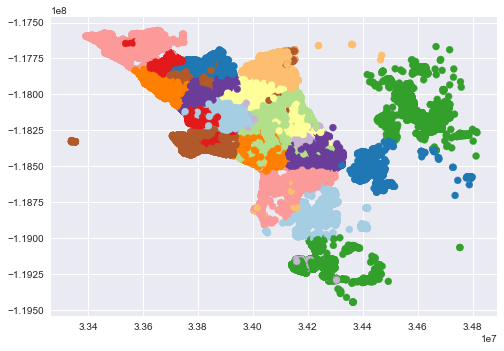

In [9]:
plt.scatter(X[:,0], X[:,1], c=labels, cmap=plt.cm.Paired)
plt.show()

In [11]:
zill['location'] = pd.Series(labels)
zill_drop = zill.drop(['regionidcounty', 'regionidneighborhood', 'regionidzip', 
                  'latitude', 'longitude', 'rawcensustractandblock', 
                  'regionidcity', 'parcelid'], axis=1)
zill_dummy = pd.get_dummies(zill_drop, columns=['location','airconditioningtypeid',
                              'buildingqualitytypeid','heatingorsystemtypeid', 
                              'propertylandusetypeid', 'fireplaceflag', 'taxdelinquencyflag',
                             'hashottuborspa'], drop_first=True)
zill_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90275 entries, 0 to 90274
Data columns (total 90 columns):
logerror                        90275 non-null float64
bathroomcnt                     90275 non-null float64
bedroomcnt                      90275 non-null float64
calculatedbathnbr               90275 non-null float64
calculatedfinishedsquarefeet    90275 non-null float64
fireplacecnt                    90275 non-null float64
fullbathcnt                     90275 non-null float64
garagecarcnt                    90275 non-null float64
garagetotalsqft                 90275 non-null float64
lotsizesquarefeet               90275 non-null float64
poolcnt                         90275 non-null float64
poolsizesum                     90275 non-null float64
roomcnt                         90275 non-null float64
threequarterbathnbr             90275 non-null float64
unitcnt                         90275 non-null float64
yardbuildingsqft17              90275 non-null float64
yardbuildin

In [14]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

X = zill_dummy.iloc[:,1:].values
y = zill_dummy.iloc[:,0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.33)


In [39]:
zill_dummy.to_csv('clean_data.csv')

In [22]:
pipeline = Pipeline([('standardscaler', StandardScaler()), 
                     ('polynomialfeatures', PolynomialFeatures(2)),
                     ('pca', PCA(n_components=2)),
                     ('linearregression', LinearRegression())
                    ])
# grid = GridSearchCV(pipeline, 
#                     {'polynomialfeatures__degree': [1,2], 
#                      #'pca__whiten': [False, True],
#                      #'pca__n_components': [60,None]
#                     }, n_jobs = -1, verbose = 3)
#grid.fit(X_train, y_train)
pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('pca', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

score = pipeline.score(X_test, y_test)
score


In [35]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
#     ('pca', PCA(n_components=50)),
    ('randomforest', RandomForestRegressor())
])

pipeline.fit(X_train, y_train)


Pipeline(steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('randomforest', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False))])

In [36]:
score = pipeline.score(X_test, y_test)
score

-0.10433321895536518

In [37]:
from sklearn.svm import SVR

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svr', SVR())
])



pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svr', SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False))])

In [38]:
score = pipeline.score(X_test, y_test)
score

-0.015446359263263432